In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mplt
import statsmodels.api as sm
import pylab as plt
from matplotlib import rc
from pylab import figure, show, legend, xlabel, ylabel

In [2]:
df = pd.read_csv('GLB.Ts.csv',skiprows=[0,139])

In [3]:
df.columns

Index(['Year', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec', 'J-D', 'D-N', 'DJF', 'MAM', 'JJA', 'SON'],
      dtype='object')

In [4]:
df.head(5)

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
0,1880,-0.87,-0.49,-0.53,-0.69,-0.40,-0.52,-0.50,0.00,-0.55,-0.68,-0.54,-0.59,-0.53,***,***,-0.54,-0.34,-0.59
1,1881,-0.82,-0.67,-0.43,-0.33,-0.09,-1.15,-0.62,-0.32,-0.46,-0.62,-0.65,-0.21,-0.53,-.56,-.70,-0.28,-0.70,-0.58
2,1882,0.02,-0.22,-0.18,-0.67,-0.45,-1.07,-0.79,-0.19,-0.11,-0.39,-0.49,-0.75,-0.44,-.39,-.14,-0.43,-0.68,-0.33
3,1883,-0.77,-1.01,-0.58,-0.42,-0.46,0.29,-0.15,-0.29,-0.58,-0.67,-0.80,-0.51,-0.50,-.52,-.84,-0.49,-0.05,-0.68
4,1884,-0.62,-0.48,-0.60,-1.00,-1.26,-0.90,-0.97,0.02,-0.46,-0.86,-0.92,-1.07,-0.76,-.71,-.54,-0.95,-0.62,-0.75


In [15]:
x=df[u'Year']
y=df[u'J-D']
plt.xlabel('Año')
plt.ylabel('Variación de Temperatura (C)')
plt.title('Anomalía de Temperatura Terrestre por Año')

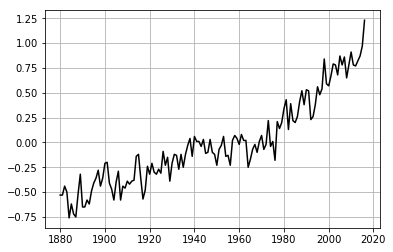

In [29]:
mplt.grid(True)
mplt.plot(x,y, color='black')
plt.show()

In [7]:
def lowess(endog, exog, frac=1.0/3.0, it=3, delta=0.0, is_sorted=False, missing='drop', return_sorted=True):

    endog = np.asarray(endog, float)
    exog = np.asarray(exog, float)

    # Inputs should be vectors (1-D arrays) of the
    # same length.
    if exog.ndim != 1:
        raise ValueError('exog must be a vector')
    if endog.ndim != 1:
        raise ValueError('endog must be a vector')
    if endog.shape[0] != exog.shape[0] :
        raise ValueError('exog and endog must have same length')

    if missing in ['drop', 'raise']:
        # Cut out missing values
        mask_valid = (np.isfinite(exog) & np.isfinite(endog))
        all_valid = np.all(mask_valid)
        if all_valid:
            y = endog
            x = exog
        else:
            if missing == 'drop':
                x = exog[mask_valid]
                y = endog[mask_valid]
            else:
                raise ValueError('nan or inf found in data')
    elif missing == 'none':
        y = endog
        x = exog
        all_valid = True   # we assume it's true if missing='none'
    else:
        raise ValueError("missing can only be 'none', 'drop' or 'raise'")

    if not is_sorted:
        # Sort both inputs according to the ascending order of x values
        sort_index = np.argsort(x)
        x = np.array(x[sort_index])
        y = np.array(y[sort_index])

    res = _lowess(y, x, frac=frac, it=it, delta=delta)
    _, yfitted = res.T

    if return_sorted:
        return res
    else:
        # rebuild yfitted with original indices
        # a bit messy: y might have been selected twice
        if not is_sorted:
            yfitted_ = np.empty_like(y)
            yfitted_.fill(np.nan)
            yfitted_[sort_index] = yfitted
            yfitted = yfitted_
        else:
            yfitted = yfitted

        if not all_valid:
            yfitted_ = np.empty_like(endog)
            yfitted_.fill(np.nan)
            yfitted_[mask_valid] = yfitted
            yfitted = yfitted_

        # we don't need to return exog anymore
        return yfitted

In [60]:
Z = lowess(y, x, frac= 0.5, it=2)

In [61]:
mplt.plot(Z[:,0],Z[:,1],color='red')

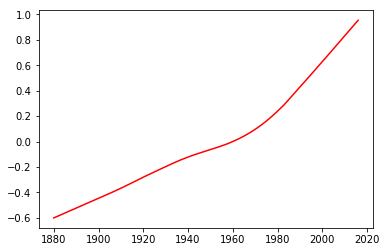

In [63]:
plt.show()

In [66]:
plt.xlabel('Año')
plt.ylabel('Variación de Temperatura (C)')
plt.title('Anomalía de Temperatura Terrestre por Año')
mplt.plot(x,y, color='black')
mplt.plot(Z[:,0],Z[:,1],color='red')

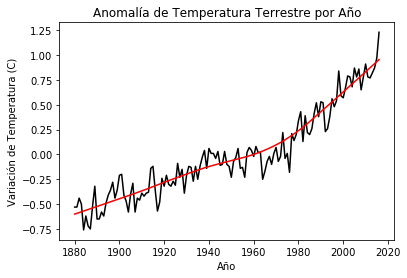

In [67]:
plt.show()